## Building a Fake News Classifier using the IFND Dataset

Link to dataset: https://www.kaggle.com/datasets/sonalgarg174/ifnd-dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IFND dataset/IFND.csv',encoding = "ISO-8859-1")

**Analyzing the dataset**

In [3]:
df.shape

(56714, 7)

In [4]:
df.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE


In [5]:
##extracting features with null values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

##print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Date 0.1996  % missing values


In [6]:
##dropping unwanted features from data
X = df.drop(['Image','Web','Date','Label'],axis=1)

In [7]:
X.head()

,id,Statement,Category
0,2,"WHO praises India's Aarogya Setu app, says it ...",COVID-19
1,3,"In Delhi, Deputy US Secretary of State Stephen...",VIOLENCE
2,4,LAC tensions: China's strategy behind delibera...,TERROR
3,5,India has signed 250 documents on Space cooper...,COVID-19
4,6,Tamil Nadu chief minister's mother passes away...,ELECTION


In [7]:
##creating a binary list of the dependent variable
y = pd.get_dummies(df['Label'])
y = y.iloc[:,0].values

In [9]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

### Pre Processing

In [8]:
messages = df.copy()

In [9]:
#Cleaning
from nltk.corpus import stopwords                  #List of stopwords (is, an, the) from english language
from nltk.stem.porter import PorterStemmer         #Stemming function
import re
ps = PorterStemmer()                               #Stemmer Object
corpus = []
for i in range(0, len(messages)):
    
    #removing everything from words except letters
    review = re.sub('[^a-zA-Z]', ' ', messages['Statement'][i])
    
    #converting all words to lower case
    review = review.lower()
    
    #splitting and storing sentences as list of words
    review = review.split()
    
    #
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]  ##stemming only those words which are not stopwords
    
    review = ' '.join(review)
    corpus.append(review)

In [11]:
corpus[998]

'union financ minist nirmala sitharaman today target congress parti chief sonia gandhi advic parti rule state bypass farm law brought centr legisl measur said opposit parti lok sabha manifesto promis agricultur produc market committe act repeal titl'

In [12]:
len(corpus[998])

248

In [13]:
lengths = np.array([x.count(' ')+1 for x in corpus])
maxLength = max(lengths)
maxpos = np.argmax(lengths)

In [14]:
maxLength

37

In [15]:
maxpos

998

### TF-IDF Vectorizer

**The Tf-Idf vectorizer converts our corpus into a vector of values between 0 and 1** - It is short for Term Frequency * Inverse Document Frequency

*Term Frequency = frequency of word in a sent / no. of words in a sent*

*Inverse Document Frequency = log(total no. of sentences / no. of sentences containing the word)*

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [17]:
X.shape

(56714, 5000)

In [18]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [19]:
tfidf_v.get_feature_names_out()[:20]

array(['aadhaar', 'aaditya', 'aaditya thackeray', 'aadmi', 'aadmi parti',
       'aaj', 'aaj tak', 'aam', 'aam aadmi', 'aamir', 'aamir khan', 'aap',
       'aap govt', 'aap leader', 'aap mla', 'aatmanirbhar', 'aayog',
       'abduct', 'abdul', 'abdullah'], dtype=object)

In [20]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [22]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())

In [23]:
count_df.head

,aadhaar,aaditya,aaditya thackeray,aadmi,aadmi parti,aaj,aaj tak,aam,aam aadmi,aamir,...,yr,yr old,ysrcp,zealand,zee,zee news,zero,zindabad,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Word2Vec

In [33]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [34]:
text = df.Statement.apply(simple_preprocess)
text

0        [who, praises, india, aarogya, setu, app, says...
1        [in, delhi, deputy, us, secretary, of, state, ...
2        [lac, tensions, china, strategy, behind, delib...
3        [india, has, signed, documents, on, space, coo...
4        [tamil, nadu, chief, minister, mother, passes,...
                               ...                        
56709    [fact, check, this, is, not, bruce, lee, playi...
56710    [fact, check, did, japan, construct, this, bri...
56711    [fact, check, viral, video, of, mexico, earthq...
56712    [fact, check, ballet, performance, by, chinese...
56713    [fact, check, is, this, little, boy, crossing,...
Name: Statement, Length: 56714, dtype: object

In [35]:
model = Word2Vec(window=10, min_count=2, workers=4)

In [36]:
model.build_vocab(text, progress_per=1000)

In [37]:
model.epochs

5

In [38]:
model.train(text, total_examples=model.corpus_count, epochs=model.epochs)

(2998598, 3608635)

### Finding Similar Words and Similarity between words

In [43]:
model.wv.most_similar("good")

[('much', 0.9406580328941345),
 ('possible', 0.9396004676818848),
 ('enough', 0.9371371269226074),
 ('important', 0.9342324733734131),
 ('too', 0.927841067314148),
 ('mean', 0.9252043962478638),
 ('green', 0.9230610728263855),
 ('demonetisation', 0.9229668378829956),
 ('ôno', 0.9221525192260742),
 ('ready', 0.9219070672988892)]

In [44]:
model.wv.most_similar("bad")

[('prevented', 0.9731720089912415),
 ('kumari', 0.9687905311584473),
 ('itï', 0.9687070846557617),
 ('chose', 0.9682887196540833),
 ('rivals', 0.9676446318626404),
 ('dropped', 0.9656383395195007),
 ('zebra', 0.9647590517997742),
 ('fatehpur', 0.9641623497009277),
 ('postal', 0.9639617800712585),
 ('winner', 0.9639606475830078)]

In [46]:
model.wv.most_similar("covid")

[('coronavirus', 0.9577255845069885),
 ('corona', 0.8269731402397156),
 ('dengue', 0.741766631603241),
 ('antigen', 0.7362602353096008),
 ('virus', 0.7284128665924072),
 ('fainted', 0.7260945439338684),
 ('nims', 0.7239343523979187),
 ('serum', 0.7184219360351562),
 ('isolated', 0.7126367092132568),
 ('medical', 0.7088669538497925)]

In [47]:
model.wv.most_similar("drugs")

[('bishop', 0.9486772418022156),
 ('franco', 0.9470992088317871),
 ('bineesh', 0.9427456855773926),
 ('icici', 0.9424391388893127),
 ('directors', 0.9422849416732788),
 ('nun', 0.9418856501579285),
 ('forensic', 0.9382248520851135),
 ('sandalwood', 0.9368215203285217),
 ('penalty', 0.9350729584693909),
 ('summoned', 0.9340781569480896)]

In [48]:
model.wv.similarity(w1="bjp", w2="covid")

-0.10727027

In [49]:
model.wv.similarity(w1="aap", w2="bjp")

0.7801846

In [24]:
import matplotlib.pyplot as plt

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Multinomial Naive Bayes Algorithm

In [41]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [42]:
from sklearn import metrics
import itertools

accuracy:   0.929
Confusion matrix, without normalization


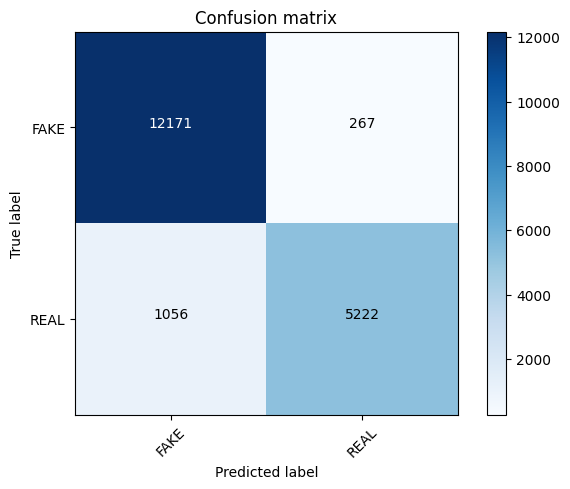

In [52]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Passive Aggressive Classifier Algorithm

In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.927
Confusion matrix, without normalization


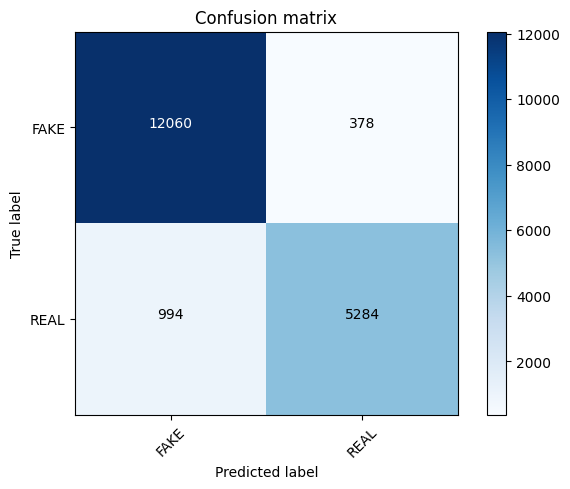

In [55]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Multinomial Classifier with Hyperparameter

In [56]:
classifier=MultinomialNB(alpha=0.1)

In [57]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Rajat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.0, Score : 0.9286706561231032
Alpha: 0.1, Score : 0.9296324000854883
Alpha: 0.2, Score : 0.9294186792049584
Alpha: 0.30000000000000004, Score : 0.9296858303056209
Alpha: 0.4, Score : 0.9297392605257534
Alpha: 0.5, Score : 0.9297926907458859
Alpha: 0.6000000000000001, Score : 0.9298461209660184
Alpha: 0.7000000000000001, Score : 0.9298995511861509
Alpha: 0.8, Score : 0.9296324000854883
Alpha: 0.9, Score : 0.9293652489848259


## Deep Learning

In [37]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [38]:
voc_size = 10000

In [39]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [40]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=maxLength)
print(embedded_docs)

[[   0    0    0 ... 7881 9282 7630]
 [   0    0    0 ... 3544 9584 6738]
 [   0    0    0 ... 4337 4230 8642]
 ...
 [   0    0    0 ... 9542 9390 2462]
 [   0    0    0 ... 5798 3322 5526]
 [   0    0    0 ... 4308 9454 2949]]


In [41]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 5956, 8642, 6664, 5046, 9912, 4757,
       3310, 7881, 9282, 7630])

In [42]:
embedded_docs[998]

array([  79, 6787, 6629, 3790, 1650,  637, 9346, 6940, 1203, 6582, 5628,
       1700, 8625, 1203, 2310, 3936, 7944, 8900, 1075, 9111, 3849, 3568,
       4005, 1390, 4026, 1203, 7204, 8426, 2837, 6510, 4131,  589, 2843,
       5543, 5118, 8363, 1561])

In [43]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=maxLength))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 40)            400000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
len(embedded_docs),y.shape

(56714, (56714,))

In [45]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [46]:
X_final.shape,y_final.shape

((56714, 37), (56714,))

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [48]:
### Finally Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
594/594 [==============================] - 28s 44ms/step - loss: 0.2486 - accuracy: 0.9031 - val_loss: 0.1838 - val_accuracy: 0.9361
Epoch 2/10
594/594 [==============================] - 26s 44ms/step - loss: 0.1540 - accuracy: 0.9467 - val_loss: 0.1836 - val_accuracy: 0.9354
Epoch 3/10
594/594 [==============================] - 26s 43ms/step - loss: 0.1292 - accuracy: 0.9551 - val_loss: 0.1877 - val_accuracy: 0.9349
Epoch 4/10
594/594 [==============================] - 26s 43ms/step - loss: 0.1085 - accuracy: 0.9622 - val_loss: 0.1972 - val_accuracy: 0.9333
Epoch 5/10
594/594 [==============================] - 27s 46ms/step - loss: 0.0906 - accuracy: 0.9679 - val_loss: 0.2378 - val_accuracy: 0.9296
Epoch 6/10
594/594 [==============================] - 26s 43ms/step - loss: 0.0741 - accuracy: 0.9733 - val_loss: 0.2424 - val_accuracy: 0.9278
Epoch 7/10
594/594 [==============================] - 26s 43ms/step - loss: 0.0641 - accuracy: 0.9761 - val_loss: 0.3135 - val_accuracy:

### Performance Metrics And Accuracy

In [52]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

585/585 [==============================] - 8s 14ms/step


In [46]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,y_pred)

array([[11772,   699],
       [  733,  5512]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9234879247702501

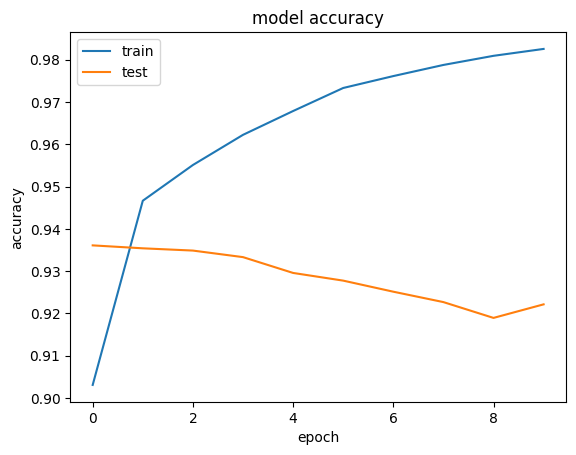

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

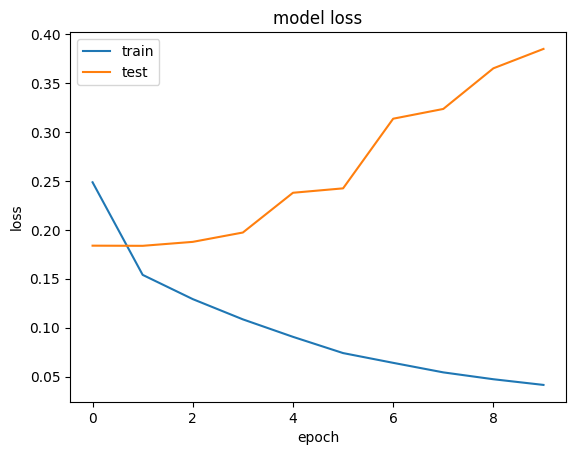

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()